In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

In [130]:
#Reads data from Melbourne Housing and Poperty Sales of Melbourne City. Sources claim to be scrapped from domain.com
dataset1 = pd.read_csv("Melbourne_housing_FULL.csv")
dataset2 = pd.read_csv("PSMS.csv")

In [131]:
#Takes our two datasets and merges them together into one.
Merged_Data = pd.merge(dataset1,dataset2,how='outer')

In [132]:
#Drop irrellevant columns and any NaN values. 
#Decided to drop suburb instead of distance. Distance will be easier to work with in a correlative model. 
data = Merged_Data.drop(["CouncilArea", "KeyID","Suburb","Address", "Method", "SellerG", "BuildingArea","Postcode","Bathroom","Car", "Landsize", "YearBuilt", "Lattitude", "Longtitude", "Regionname", "Propertycount"], axis = 1)
data = data.dropna()
data['Date']= pd.to_datetime(data['Date'])
data.drop_duplicates(inplace = True)

/var/folders/6v/74b214ls7_798txz_7z7rh8m0000gn/T/ipykernel_15337/627966060.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']= pd.to_datetime(data['Date'])


In [133]:
#Encoding the suburb into a binary format. probably a better way to do this but not sure. Location is surely correlated to price. Perhaps we should use distance to CBD instead?
#data = pd.get_dummies(data, columns=['Suburb'])

In [134]:
#Encoding the Type into a binary format. H = house, T = townhouse, U = unit  
data = pd.get_dummies(data, columns = ["Type"])
data

,Rooms,Price,Date,Distance,Bedroom2,Type_h,Type_t,Type_u
0,2,1075000.0,2017-10-14,3.0,2.0,True,False,False
2,3,1001000.0,2017-08-19,3.0,3.0,False,False,True
4,2,505000.0,2017-05-27,3.0,2.0,False,False,True
6,4,1525000.0,2017-08-12,3.0,4.0,False,True,False
8,2,940000.0,2017-08-12,3.0,2.0,True,False,False
...,...,...,...,...,...,...,...,...
53238,3,955000.0,2016-09-24,7.0,3.0,True,False,False
53240,2,381000.0,2017-02-11,7.0,2.0,False,False,True
53242,2,950000.0,2017-05-06,7.0,2.0,True,False,False
53245,2,820000.0,2017-05-20,7.0,2.0,True,False,False


In [135]:
from sklearn.model_selection import train_test_split
X = data.drop(['Price'], axis = 1)
Y = data['Price']

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [137]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Bedroom2'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

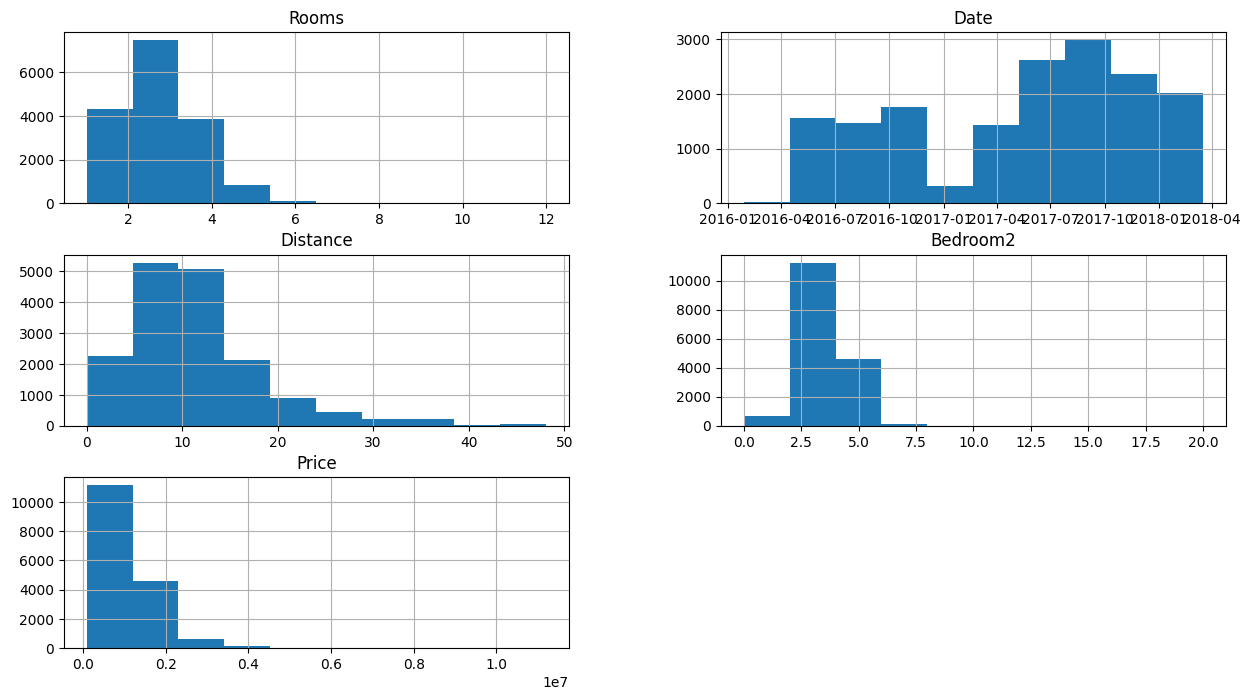

In [138]:
train_data.corr()
train_data.hist(figsize=(15,8))

In [139]:
#Simple Linear Regression model
from sklearn.linear_model import LinearRegression
X_train, Y_train = train_data.drop(['Price'], axis=1), train_data['Price']
reg = LinearRegression()
reg.fit(X_train,Y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [ ]:
train_data = train_data = X_train.join(Y_train)